In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

In [15]:
df_bank = pd.read_csv(r'C:\Users\User\Dropbox\My PC (9470m)\Desktop\Data Science\PYTHON\Machine Learning\bank.csv')

In [16]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [17]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [18]:
df_bank.shape

(4521, 17)

In [19]:
df_bank['y'].unique()

array(['no', 'yes'], dtype=object)

In [20]:
df_bank.age.value_counts()

34    231
32    224
31    199
36    188
33    186
     ... 
76      2
84      1
81      1
86      1
87      1
Name: age, Length: 67, dtype: int64

Text(0.5, 1.0, 'Ratio of customer subscription for the deposit ')

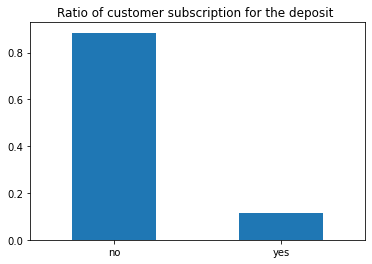

In [21]:
df_bank.y.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Ratio of customer subscription for the deposit ')

In [22]:
df_bank.y.value_counts(normalize=True)

no     0.88476
yes    0.11524
Name: y, dtype: float64

Text(0, 0.5, 'Count')

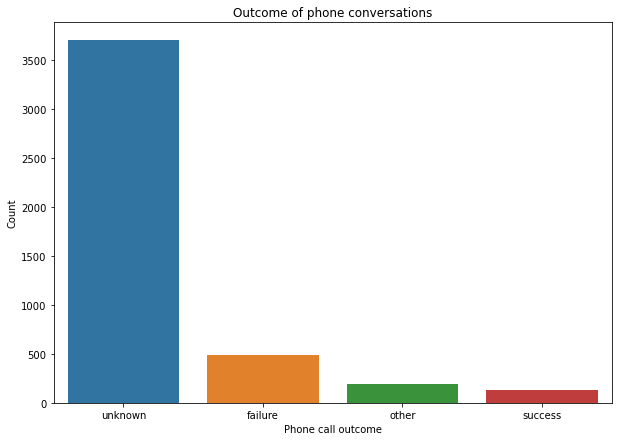

In [23]:
plt.figure(figsize=(10,7))
plt.title('Outcome of phone conversations')
sns.countplot(x='poutcome', data=df_bank)

plt.xlabel('Phone call outcome')
plt.ylabel('Count')

In [24]:
df_bank ['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

Text(0.5, 1.0, 'How Jobs affect Customer Purchase')

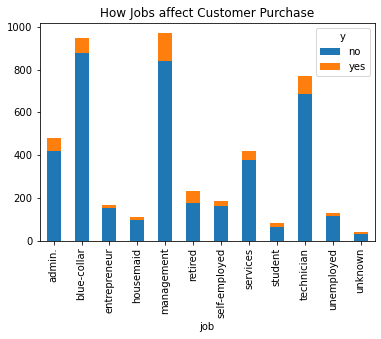

In [25]:
y_job_pivot = pd.crosstab(df_bank.job,df_bank.y)
y_job_pivot.plot.bar(stacked=True)
plt.title('How Jobs affect Customer Purchase')

#### Comment on Result:
Those who are retired or have blue-collar jobs, or with jobs in management, admin and technicians have subscribed. This makes sense as out of the occupations given, these are the well paying jobs and the jobs that are more stable.

Text(0.5, 1.0, 'How Existing Loans affect Customer Decision')

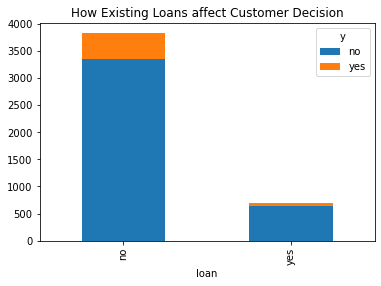

In [26]:
y_job_pivot = pd.crosstab(df_bank.loan,df_bank.y)
y_job_pivot.plot.bar(stacked=True)
plt.title('How Existing Loans affect Customer Decision')

#### Comment on Result:
People without loans have a higher yes than those with loans.

Text(0.5, 1.0, 'Concentration of Likely Target Customers')

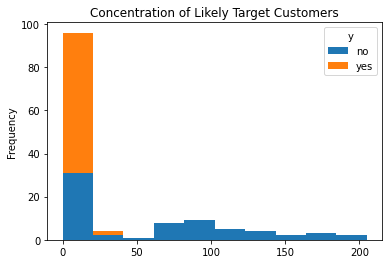

In [27]:
y_job_pivot = pd.crosstab(df_bank.age,df_bank.y)
y_job_pivot.plot.hist(stacked=True, rot=0)
plt.title('Concentration of Likely Target Customers')

#### Comment on Result:
Using a histogram, we can see that majority of the answers came from people aged 19-49. If we look at this on a bar chart, we would see that this is more concentrated between age 30-38. See next cell:


Text(0.5, 1.0, 'How Age Affects Decision')

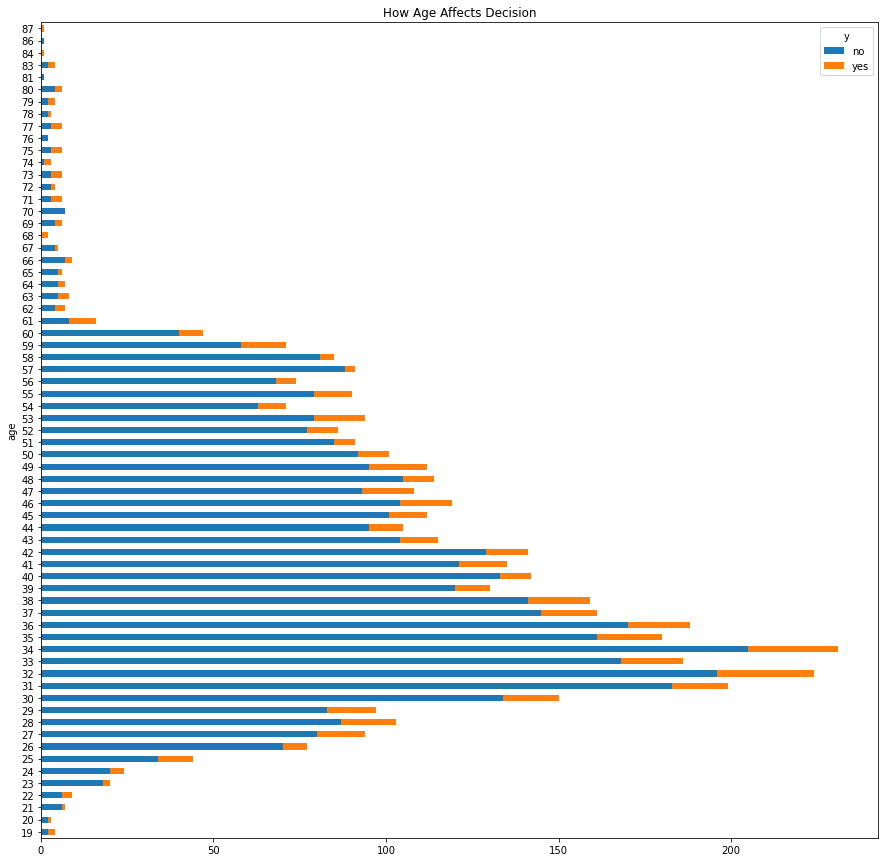

In [28]:
y_job_pivot.plot.barh(stacked=True, rot=0, figsize = (15,15))
plt.title('How Age Affects Decision')

#### Comment on Result:
It makes sense that majority of the 'yes' comes from people between 30-38 as these are people earn more than those between 19 and 29 but also have less responsibilities than those aged 40-60, and have more stable earnings than those who are retired. Therefore, they are likely to be the age group able to spare some cash for a deposite subscription. 

Text(0.5, 1.0, 'Correlation between Columns')

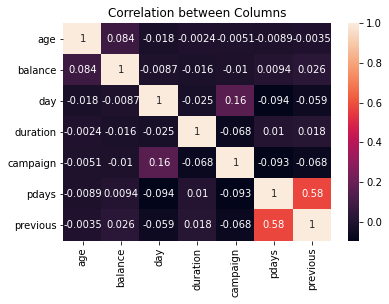

In [29]:
corel = df_bank.corr()
sns.heatmap(corel,annot=True)
plt.title('Correlation between Columns')

## Feature Engineering & One-Hot Encoding

In [30]:
df_bank.y.replace('yes', 1, inplace=True)
df_bank.y.replace('no', 0, inplace=True)

In [31]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [32]:
categorical = ['job', 'marital', 'education','default','housing','loan','contact','month','poutcome' ]

In [33]:
categories_dumies = pd.get_dummies(df_bank[categorical])
categories_dumies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [34]:
print(df_bank.shape)

(4521, 17)


In [35]:
df_bank = pd.concat([df_bank,categories_dumies],axis=1)
print (df_bank.shape)

(4521, 61)


In [36]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,1,0,0,0,0,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,1,0,0,0,1,0,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0,0,0,0,0,0,1,0,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,1,0,0,0,0,0,0,0,0,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1


In [37]:
df_bank = df_bank.drop(categorical, axis=1)
df_bank.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


## MODELLING

In [38]:
y = df_bank.y
X = df_bank.drop('y', axis = 1)

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [40]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.4)

In [41]:
LR = LogisticRegression()

In [42]:
KN = KNeighborsClassifier()

In [43]:
DC = DecisionTreeClassifier()

In [44]:
RF = RandomForestClassifier()

In [45]:
models = [LR, KN, DC, RF]

In [46]:
def trainer (model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    prediction = model.predict(X_valid)
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_valid)))
    #print(classification_report(prediction,y_valid)) #use this later

In [47]:
for model in models:
    trainer(model,X_train,y_train,X_valid,y_valid)
    

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



For LogisticRegression, Accuracy score is 0.8894416804864566 


For KNeighborsClassifier, Accuracy score is 0.8739635157545605 


For DecisionTreeClassifier, Accuracy score is 0.8640132669983416 


For RandomForestClassifier, Accuracy score is 0.8955223880597015 



###### RandomForescastClassifier has the highest score so we will work with that.

## Fetching Importances

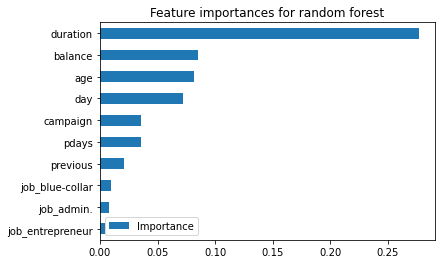

In [48]:
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_valid.columns, columns=['Importance'])
RF_importances[:10].sort_values(by='Importance').plot.barh()
plt.title('Feature importances for random forest')
plt.show()

In [49]:
RF_importances[:10].sort_values(by='Importance').index.values

array(['job_entrepreneur', 'job_admin.', 'job_blue-collar', 'previous',
       'pdays', 'campaign', 'day', 'age', 'balance', 'duration'],
      dtype=object)

## Accuracy, Precision and Recall:

In [50]:
X_train2 = X_train[['job_entrepreneur', 'job_admin.', 'job_blue-collar', 'previous',
       'campaign', 'pdays', 'day', 'age', 'balance', 'duration']]
X_train2.head(2)

,job_entrepreneur,job_admin.,job_blue-collar,previous,campaign,pdays,day,age,balance,duration
750,0,1,0,0,10,-1,15,57,1,17
3652,0,1,0,1,1,357,19,29,1070,30


In [51]:
X_valid2 = X_valid[['job_entrepreneur', 'job_admin.', 'job_blue-collar', 'previous',
       'campaign', 'pdays', 'day', 'age', 'balance', 'duration']]

In [52]:
# Import neccsary libaries

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [53]:
RF.fit(X_train2,y_train)
pred2 = RF.predict(X_valid2)

print('Our model accuracy is still high at:')
print(accuracy_score(pred2,y_valid))

Our model accuracy is still high at:
0.8800442233278054


In [54]:
#We train and predict to obtain the precision score:

p_positive = precision_score(pred2, y_valid, pos_label=1)
print(p_positive)

p_negative = precision_score(pred2, y_valid, pos_label=0)
print(p_negative)

0.19402985074626866
0.9657960199004975


In [55]:
#We train and predict to get the recall score:

r_positive = recall_score(pred2, y_valid, pos_label=1)
print(r_positive)

r_negative = recall_score(pred2, y_valid, pos_label=0)
print(r_negative)

0.4148936170212766
0.9055393586005831


## Model cross-validation using k-fold

In [56]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [57]:
def trainer_mcv(model,X,y):
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy: %.3f' % (mean(scores)))

In [58]:
for model in models:
    trainer_mcv(model,X_train2,y_train)
    

Accuracy: 0.880
Accuracy: 0.876
Accuracy: 0.854
Accuracy: 0.887


In [59]:
# Generate the classification report

print(classification_report(pred2, y_valid))

              precision    recall  f1-score   support

           0       0.97      0.91      0.93      1715
           1       0.19      0.41      0.26        94

    accuracy                           0.88      1809
   macro avg       0.58      0.66      0.60      1809
weighted avg       0.93      0.88      0.90      1809



## Conclusion:
Certainly, our model (RandomForestClassifier) works very well, is stable and can generalise to new data. 
It has mainainted an accuracy score between 89% and 91% which is a strong score. However, a close second will be the 
Logistic Regression which has constantly fallen behind the RF model by 1%. 

In addition to accuracy, more evaluations were conducted by testing precision and recall from which it was deduced that of the 1809 tested data, 96% were negative meaning that 96% of the people did not subscribe to the product while the 19% positive values are those who subscribed to the product. For recall, the model has an accuracy of 90% for those who would not subscribe to the product and a 41% accuracy for those who would subscribe to the product. 